In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff 

In [20]:
import numpy as np
import pandas as pd
from scipy import stats
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [21]:
from ipca_aff_cpd import IPCAAFFCPD

In [32]:
COLUMN_NAMES = [
    'user',
    'activity',
    'timestamp',
    'x-axis',
    'y-axis',
    'z-axis'
]

LABELS = [
    'Downstairs',
    'Jogging',
    'Sitting',
    'Standing',
    'Upstairs',
    'Walking'
]

DF_COLUMNS = [
    'x-axis',
    'y-axis',
    'z-axis'
]

DATA_PATH = '/Users/jarus/Work/incremental-change-point-detection/ipca_aff_cpd/data/WISDM/WISDM_ar_v1.1_raw.txt'

In [25]:
df = pd.read_csv(DATA_PATH, header=None, names=COLUMN_NAMES)
df['z-axis'].replace({';': ''}, regex=True, inplace=True)
data = df.dropna()

In [44]:
def calculate_cpd(df):
    X = np.array(df)
    # dft, Xt: row: time points (time), col: data points (KPs)
    Xt = X.transpose()
    dft = df.transpose()

    aff = IPCAAFFCPD(alpha=0.2)
    change_points = []
    pca_results = []
    for i in range(Xt.shape[0]):
        change = aff.feed_predict(Xt[i, :])
        if change:
            print("Here is a change", i)
            change_points.append(i)

    dft.plot.line(color="blue", linewidth=1, legend=False, alpha=0.5)
    for change_point in change_points:
        plt.axvline(x=change_point, color="#c74e52")

    plt.show()

In [26]:
user_df = df.groupby(['user'])

In [77]:
def test_user(user_df, userid):
    usr_df = user_df.get_group(userid)
    usr_df = usr_df.set_index('timestamp')
    print(usr_df['activity'].unique())
    usr_df = usr_df[DF_COLUMNS]
    usr_df_T = usr_df.T
    print(usr_df_T.shape)
    
    calculate_cpd(usr_df_T)

['Walking' 'Jogging' 'Upstairs' 'Downstairs' 'Standing']
(3, 34883)
Here is a change 12
Here is a change 23
Here is a change 53
Here is a change 64
Here is a change 75
Here is a change 431
Here is a change 442
Here is a change 457
Here is a change 468
Here is a change 558
Here is a change 569
Here is a change 580
Here is a change 591
Here is a change 6693
Here is a change 6715
Here is a change 6726
Here is a change 6741
Here is a change 6757
Here is a change 6773
Here is a change 6789
Here is a change 6804
Here is a change 6821
Here is a change 6836
Here is a change 6852
Here is a change 6868
Here is a change 6884
Here is a change 6900
Here is a change 6916
Here is a change 6931
Here is a change 6948
Here is a change 6964
Here is a change 6975
Here is a change 6987
Here is a change 7001
Here is a change 7012
Here is a change 7028
Here is a change 7043
Here is a change 7054
Here is a change 7065
Here is a change 7076
Here is a change 7091
Here is a change 7102
Here is a change 7115
Here

Here is a change 25819
Here is a change 25831
Here is a change 25855
Here is a change 25868
Here is a change 25881
Here is a change 25892
Here is a change 25917
Here is a change 25929
Here is a change 25943
Here is a change 25956
Here is a change 25969
Here is a change 25990
Here is a change 26005
Here is a change 26016
Here is a change 26034
Here is a change 26047
Here is a change 26058
Here is a change 26077
Here is a change 26089
Here is a change 26103
Here is a change 26120
Here is a change 26140
Here is a change 26155
Here is a change 26168
Here is a change 26186
Here is a change 26206
Here is a change 26217
Here is a change 26231
Here is a change 26246
Here is a change 26257
Here is a change 26269
Here is a change 26313
Here is a change 26331
Here is a change 26342
Here is a change 26354
Here is a change 26372
Here is a change 26385
Here is a change 26396
Here is a change 26407
Here is a change 26429
Here is a change 26443
Here is a change 26459
Here is a change 26476
Here is a c

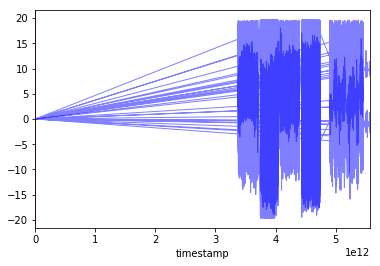

In [78]:
test_user(user_df,10)

In [79]:
def plotXaccVSTimestamp():
    # SHOW GRAPH FOR JOGGING
    data[data['activity'] == 'Sitting'][['x-axis']][:100].plot(subplots=True, figsize=(16, 12), title='Sitting')
    plt.xlabel('Timestep')
    plt.ylabel('X acceleration (dg)')